In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


In [2]:
df = pd.read_csv('Microsoft_Stock.csv')
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [4]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455


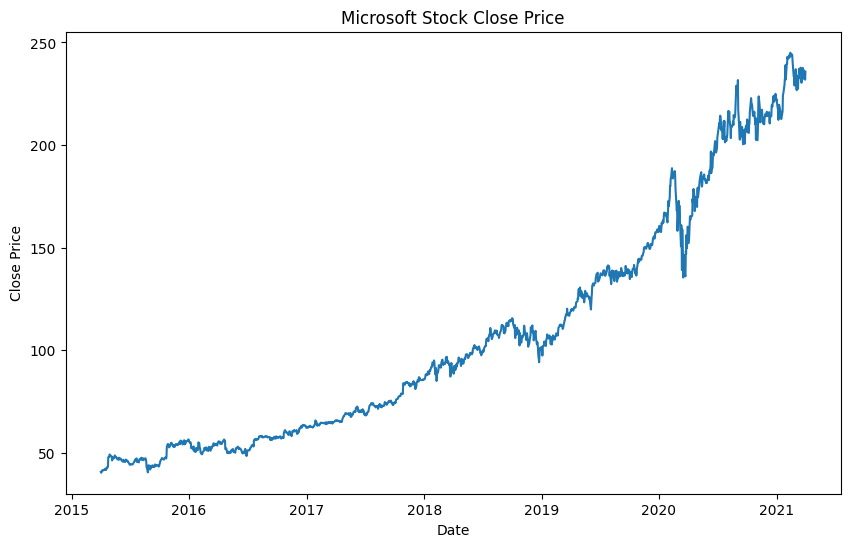

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('Microsoft Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [7]:
ts = df['Close']

In [8]:
ts

Date
2015-04-01 16:00:00     40.72
2015-04-02 16:00:00     40.29
2015-04-06 16:00:00     41.55
2015-04-07 16:00:00     41.53
2015-04-08 16:00:00     41.42
                        ...  
2021-03-25 16:00:00    232.34
2021-03-26 16:00:00    236.48
2021-03-29 16:00:00    235.24
2021-03-30 16:00:00    231.85
2021-03-31 16:00:00    235.77
Name: Close, Length: 1511, dtype: float64

### ADF test

In [9]:
def adf_test(time_series):
    df_test = adfuller(time_series,autolag='AIC')
    df_op = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for k,v in df_test[4].items():
        df_op['Critical Value(%s)'%k] = v
    print(df_op)
    

In [10]:
adf_test(ts)

Test Statistic                    1.737136
p-value                           0.998216
#Lags Used                       24.000000
Number of Observations Used    1486.000000
Critical Value(1%)               -3.434758
Critical Value(5%)               -2.863487
Critical Value(10%)              -2.567807
dtype: float64


Since p-value is greater than 0.05 we cannot reject the null - hypothesis, the time series is indeed stationary

### KPSS test

In [12]:
ts_diff = ts.diff().dropna()
ts_diff

Date
2015-04-02 16:00:00   -0.43
2015-04-06 16:00:00    1.26
2015-04-07 16:00:00   -0.02
2015-04-08 16:00:00   -0.11
2015-04-09 16:00:00    0.06
                       ... 
2021-03-25 16:00:00   -3.12
2021-03-26 16:00:00    4.14
2021-03-29 16:00:00   -1.24
2021-03-30 16:00:00   -3.39
2021-03-31 16:00:00    3.92
Name: Close, Length: 1510, dtype: float64

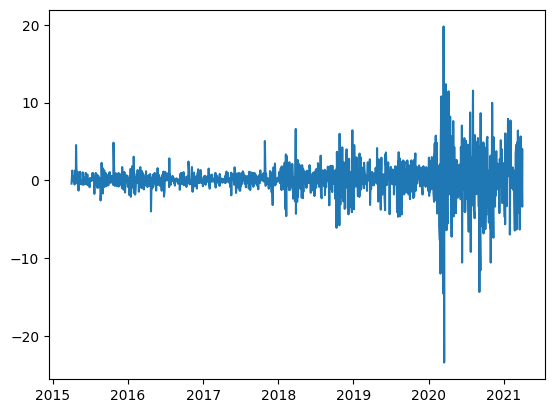

In [13]:
plt.plot(ts_diff)